In [77]:
from scipy.stats import norm
from scipy.optimize import newton
import numpy as np
import matplotlib.pyplot as plt

class Agent:
    """This is a class for representing a strategic agent.

    Keyword arguments:
    eta -- natural ability of agent (D x 1)
    gamma -- gaming ability of agent (D x 1)
    """
    def __init__(self, eta, gamma):
        self.eta = eta
        self.gamma = gamma

    def best_response(self, s, beta, sigma):
        """Method for computing an agent's best response given a particular model and threshold under a noise assumption.

        Keyword arguments:
        beta -- model parameters (D x 1)
        s -- threshold (float)
        sigma -- standard deviation of the noise distribution (float)
        """
        #try:
        val = newton(Agent._func_derivative_utility(beta, s, self.eta, self.gamma, sigma), x0=self.eta.flatten(),  maxiter=5000)

            #val = self.eta

        val = np.clip(val, a_min=0., a_max=1.)
        return val
    
    def plot_best_response_score(self, beta, sigma):
        bounds = compute_score_bounds(beta)
        thresholds = np.linspace(bounds[0], bounds[1], 50)
        br = [np.matmul(np.transpose(beta), self.best_response(s, beta, sigma)).item() for s in thresholds]
        plt.xlabel("Threshold")
        plt.ylabel("Score of Best Response")
        plt.title("Score of Agent's Best Response vs. Threshold")
        plt.plot(thresholds, br)
        plt.show()
        plt.close()
        
    
    @staticmethod
    def _func_derivative_utility(beta, s, eta, gamma, sigma):
        """Method that returns a function that compute the derivative of an agent's utility function.
        Note that scipy's implementation of Newton's Method expects arrays of shape (D,) so the function below
        takes input of shape (D,). The input is reshaped to a (D x 1) vector in the method and the output is again
        reshaped to be of shape (D,)
        """
        def f(x):
            d = x.reshape(eta.shape) - eta
            cost_of_gaming= -2 *np.matmul(np.transpose(d), np.diag(gamma.flatten()))
            score = np.matmul(np.transpose(beta), x).item()
            allocation = norm.pdf(s - score, loc=0., scale=sigma) * np.transpose(beta)
            val = cost_of_gaming + allocation
            return (cost_of_gaming + allocation).flatten()
        return f

In [78]:
def compute_score_bounds(beta):
    """Method that returns bounds on the highest and lowest possible scores that an agent can achieve.
    Assumes that agents take actions in [0, 1]^D

    Keyword arguments:
    beta -- model parameters
    """
    min_score = 0.
    max_score = 0.
    for param in beta:
        if param >= 0:
            max_score += param
        else:
            min_score -= param
    return min_score, max_score

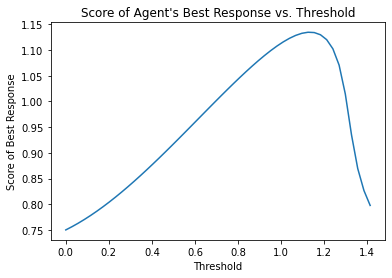

In [79]:
import numpy as np

eta = np.array([0.5, 0.5]).reshape(2, 1)
gamma = np.array([1., 2.]).reshape(2, 1)
agent = Agent(eta, gamma)
beta = np.array([np.sin(np.pi/4), np.cos(np.pi/4)]).reshape(2, 1)
agent.plot_best_response_score(beta, 0.35)
